# Covid-19 HDI Correlation
The Human Development Index (HDI) is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development. A country scores a higher HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher. 

This segement was created simply because I was curious whether or not HDI would correlate with the number of confirmed cases/deaths/recovered experienced by a country.

Another potential index I would like to consider in the future is population density. 

### Hypothesis
One would assume that given a higher HDI, a country would experience higher rates of recovery and lower death rates. This is due to better access to healthcare and resources.

The number of confirmed cases on the other hand is slightly less clear. Countries on the high HDI scale tend to have more developed institutions and greater institutional power, with this one would assume greater regulations in restricting Covid-19 spread. Combined with more resources and just generally being more developed in all aspects, one would assume Covid-19 spread would be lower.

This is however a double edged sword as a more developed country tends to be more 'global' and interconnected. Meaning higher flow of people, potentially leading to higher spreads.

## Acknowledgements:
Covid-19 Data -https://github.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning

HDI Data - https://en.wikipedia.org/wiki/Human_Development_Index (2018-2019 dataframe)

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid19 = pd.read_csv('covid_19_clean_complete.csv')

In [4]:
HDI = pd.read_csv('HDI.csv')

In [7]:
HDI.head(10)

,Rank,Change in Rank,Country,HDI,Change in HDI
0,Very high human development,NaN,NaN,NaN,NaN
1,1,NaN,Norway,0.954,0.16
2,2,NaN,Switzerland,0.946,0.18
3,3,NaN,Ireland,0.942,0.71
4,4,NaN,Germany,0.939,0.25
5,4,(2),Hong Kong,0.939,0.51
6,6,(1),Australia,0.938,0.17
7,6,(1),Iceland,0.938,0.64
8,8,(1),Sweden,0.937,0.42
9,9,NaN,Singapore,0.935,0.35


In [30]:
HDI.set_index(HDI['Country'], inplace = True)

In [46]:
HDI.head()

,Rank,Change in Rank,Country,HDI,Change in HDI
Country,,,,,
NaN,Very high human development,NaN,NaN,NaN,NaN
Norway,1,NaN,Norway,0.954,0.16
Switzerland,2,NaN,Switzerland,0.946,0.18
Ireland,3,NaN,Ireland,0.942,0.71
Germany,4,NaN,Germany,0.939,0.25


In [48]:
HDI.drop(['Country'], axis = 1, inplace = True)

In [50]:
HDI.head()

,Rank,Change in Rank,HDI,Change in HDI
Country,,,,
NaN,Very high human development,NaN,NaN,NaN
Norway,1,NaN,0.954,0.16
Switzerland,2,NaN,0.946,0.18
Ireland,3,NaN,0.942,0.71
Germany,4,NaN,0.939,0.25


In [9]:
covid19.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0,0,0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0


In [3]:
covid19['Date'] = pd.to_datetime(covid19['Date'])

In [4]:
latest = covid19['Date'] == covid19['Date'].max()

In [5]:
covid19latest = covid19[latest]

In [6]:
#reformatting dataframe to make 'Coutnry' the index

covid19latest = covid19latest.groupby('Country/Region').sum()

In [51]:
covid19latest.head()

,Lat,Long,Confirmed,Deaths,Recovered
Country/Region,,,,,
Afghanistan,33.0000,65.0000,11173,219,1097
Albania,41.1533,20.1683,1004,32,795
Algeria,28.0339,1.6596,8503,609,4747
Andorra,42.5063,1.5218,763,51,663
Angola,-11.2027,17.8739,70,4,18


In [53]:
#adding the HDI column to the corresponding country
#I recognize that the index names must be the same for this method to work, and that some countries have different names,
#eg. East Timor vs Timor-Leste or Burma vs Myanmar
#for this set I did not adjust these countries and hence we have a few that are left out.

covid19HDIlatest = covid19latest.join(HDI)

In [55]:
covid19HDIlatest.drop(['Change in Rank', 'Change in HDI'], axis = 1, inplace = True)

In [56]:
covid19HDIlatest.head()

,Lat,Long,Confirmed,Deaths,Recovered,Rank,HDI
Afghanistan,33.0000,65.0000,11173,219,1097,170,0.496
Albania,41.1533,20.1683,1004,32,795,69,0.791
Algeria,28.0339,1.6596,8503,609,4747,82,0.759
Andorra,42.5063,1.5218,763,51,663,36,0.857
Angola,-11.2027,17.8739,70,4,18,149,0.574


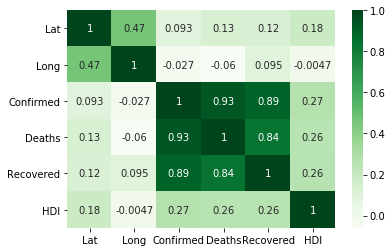

In [58]:
#correlation heatmap

sns.heatmap(covid19HDIlatest.corr(),annot = True, cmap = 'Greens')

In [59]:
covid19HDIlatest.to_csv('covid19 latest + HDI.csv', index = False)

In [63]:
#Top 10 HDI Countries in Descending order

covid19HDIlatest.sort_values(by = 'HDI', ascending = False).head(10)

,Lat,Long,Confirmed,Deaths,Recovered,Rank,HDI
Norway,60.4720,8.4689,8364,235,7727,1,0.954
Switzerland,46.8182,8.2275,30746,1913,28200,2,0.946
Ireland,53.1424,-7.6921,24698,1606,21060,3,0.942
Germany,51.0000,9.0000,180600,8309,161199,4,0.939
Iceland,64.9631,-19.0208,1804,10,1791,6,0.938
Australia,-255.9695,1129.8623,7126,102,6552,6,0.938
Sweden,63.0000,16.0000,33843,4029,4971,8,0.937
Singapore,1.2833,103.8333,31960,23,15738,9,0.935
Netherlands,94.8633,-196.7893,45641,5849,168,10,0.933
Denmark,189.8634,-40.0143,11586,563,10162,11,0.930


In [65]:
top10 = covid19HDIlatest.sort_values(by = 'HDI', ascending = False).head(10)

In [66]:
list(top10.index.values)

['Norway',
 'Switzerland',
 'Ireland',
 'Germany',
 'Iceland',
 'Australia',
 'Sweden',
 'Singapore',
 'Netherlands',
 'Denmark']

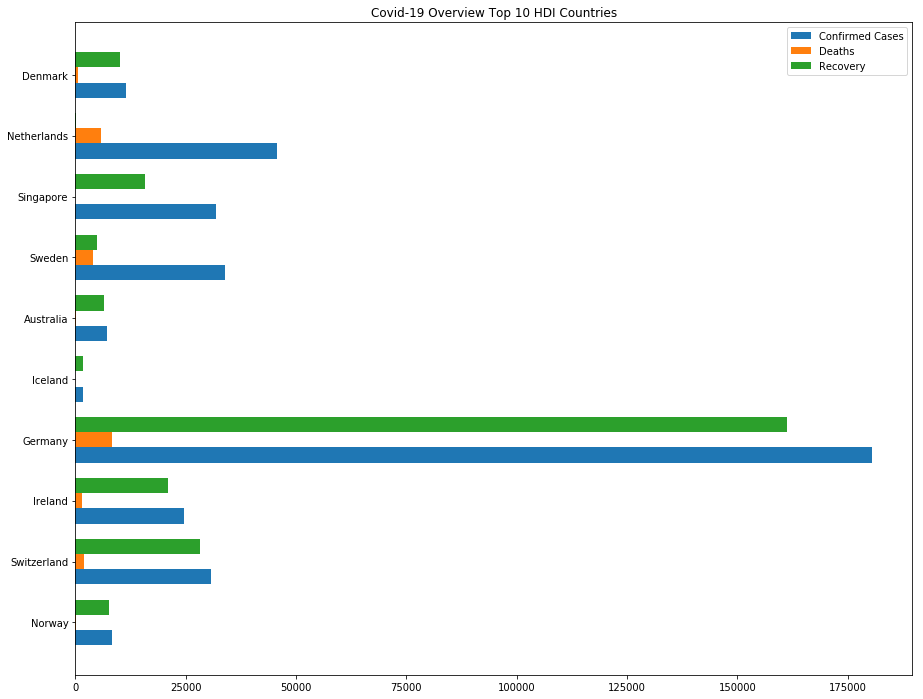

In [67]:
#Bar Chart of top 10 HDI Countries in Ascending order of HDI, displaying latest Confirmed Cases, Deaths and Recovery Count

country = list(top10.index.values)
indx = np.arange(len(country))

Confirmed = list(top10['Confirmed'])
Deaths = list(top10['Deaths'])
Recovery = list(top10['Recovered'])

plt.rcParams['figure.figsize'] = (15,12)
barwidth = 0.25


fig, ax = plt.subplots()
plt.title('Covid-19 Overview Top 10 HDI Countries')


BarConfirmed = ax.barh(indx - barwidth, Confirmed, barwidth, label = 'Confirmed Cases')
BarDeaths = ax.barh(indx, Deaths, barwidth, label = 'Deaths')
BarRecovery = ax.barh(indx + barwidth, Recovery, barwidth, label = 'Recovery')

ax.set_yticks(indx)
ax.set_yticklabels(country)

plt.legend()
plt.show()

In [64]:
#Bottom 10 HDI Countries in Ascending order
covid19HDIlatest.sort_values(by = 'HDI', ascending = True).head(10)

,Lat,Long,Confirmed,Deaths,Recovered,Rank,HDI
Niger,17.607800,8.081700,951,62,786,189,0.377
Central African Republic,6.611100,20.939400,652,1,22,188,0.381
Chad,15.454200,18.732200,687,61,244,187,0.401
South Sudan,6.877000,31.307000,806,8,0,186,0.413
Burundi,-3.373100,29.918900,42,1,20,185,0.423
Mali,17.570692,-3.996166,1059,67,604,184,0.427
Burkina Faso,12.238300,-1.561600,832,52,672,182,0.434
Eritrea,15.179400,39.782300,39,0,39,182,0.434
Sierra Leone,8.460555,-11.779889,735,42,293,181,0.438
Mozambique,-18.665695,35.529562,209,1,0,180,0.446


In [68]:
btm10 = covid19HDIlatest.sort_values(by = 'HDI', ascending = True).head(10)

In [69]:
list(btm10.index.values)

['Niger',
 'Central African Republic',
 'Chad',
 'South Sudan',
 'Burundi',
 'Mali',
 'Burkina Faso',
 'Eritrea',
 'Sierra Leone',
 'Mozambique']

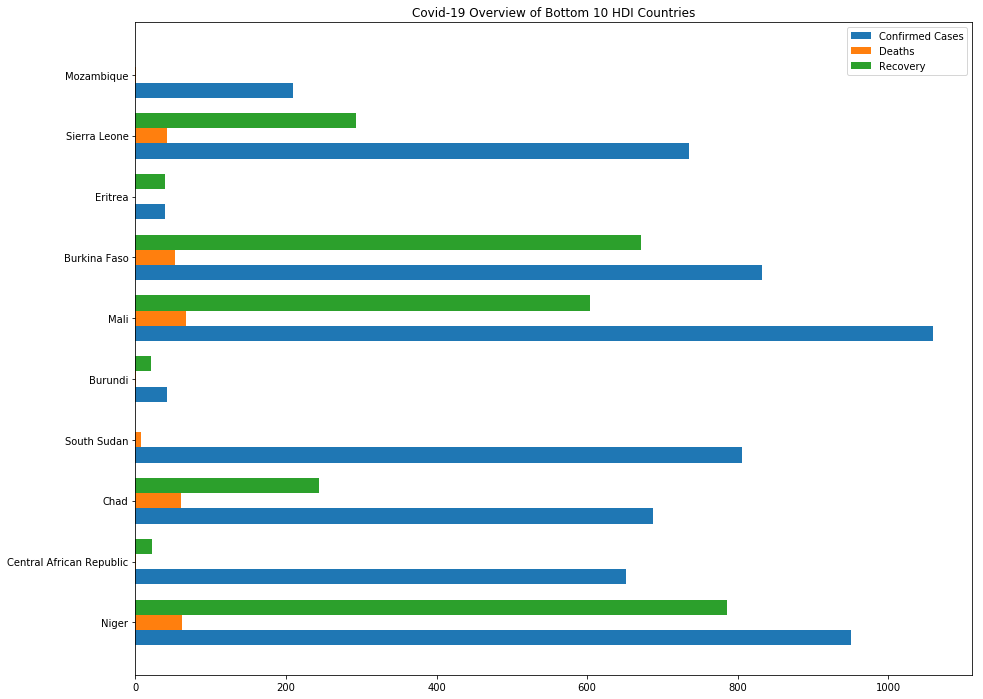

In [71]:
#Bar Chart of bottom 10 HDI Countries in Ascending order of HDI, displaying latest Confirmed Cases, Deaths and Recovery Count

country = list(btm10.index.values)
indx = np.arange(len(country))

Confirmed = list(btm10['Confirmed'])
Deaths = list(btm10['Deaths'])
Recovery = list(btm10['Recovered'])

plt.rcParams['figure.figsize'] = (15,12)
barwidth = 0.25


fig, ax = plt.subplots()
plt.title('Covid-19 Overview of Bottom 10 HDI Countries')


BarConfirmed = ax.barh(indx - barwidth, Confirmed, barwidth, label = 'Confirmed Cases')
BarDeaths = ax.barh(indx, Deaths, barwidth, label = 'Deaths')
BarRecovery = ax.barh(indx + barwidth, Recovery, barwidth, label = 'Recovery')

ax.set_yticks(indx)
ax.set_yticklabels(country)

plt.legend()
plt.show()


In [7]:
#looking at the 10 countries with the highest confirmed case counts

covidtop10 = covid19latest.sort_values(['Confirmed'], ascending = False).head(10)

In [8]:
covidtop10

,Lat,Long,Confirmed,Deaths,Recovered
Country/Region,,,,,
US,37.0902,-95.7129,1662302,98220,379157
Brazil,-14.2350,-51.9253,374898,23473,153833
Russia,60.0000,90.0000,353427,3633,118798
United Kingdom,270.0299,-482.9247,262547,36996,1161
Spain,40.0000,-4.0000,235400,26834,150376
Italy,43.0000,12.0000,230158,32877,141981
France,91.3624,59.7192,183067,28460,65317
Germany,51.0000,9.0000,180600,8309,161199
Turkey,38.9637,35.2433,157814,4369,120015


In [9]:
list(covidtop10.index.values)

['US',
 'Brazil',
 'Russia',
 'United Kingdom',
 'Spain',
 'Italy',
 'France',
 'Germany',
 'Turkey',
 'India']

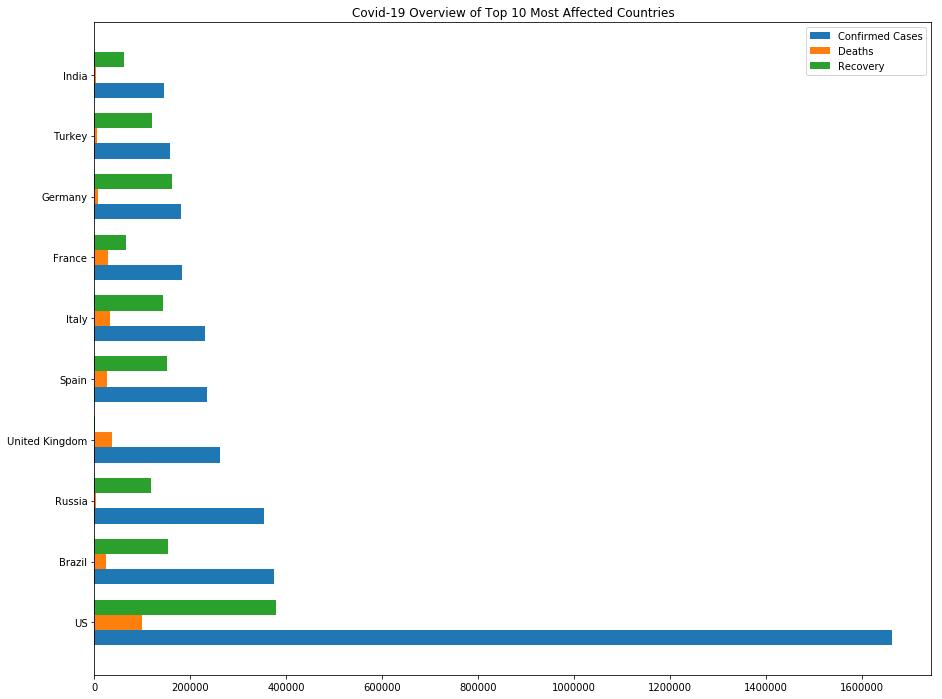

In [10]:
country = list(covidtop10.index.values)
indx = np.arange(len(country))

Confirmed = list(covidtop10['Confirmed'])
Deaths = list(covidtop10['Deaths'])
Recovery = list(covidtop10['Recovered'])

plt.rcParams['figure.figsize'] = (15,12)
barwidth = 0.25


fig, ax = plt.subplots()
plt.title('Covid-19 Overview of Top 10 Most Affected Countries')


BarConfirmed = ax.barh(indx - barwidth, Confirmed, barwidth, label = 'Confirmed Cases')
BarDeaths = ax.barh(indx, Deaths, barwidth, label = 'Deaths')
BarRecovery = ax.barh(indx + barwidth, Recovery, barwidth, label = 'Recovery')

ax.set_yticks(indx)
ax.set_yticklabels(country)

plt.legend()
plt.show()